In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
fake_job = pd.read_csv('df_cleaned.csv')

In [3]:
fake_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           10593 non-null  int64
 1   has_company_logo     10593 non-null  int64
 2   employment_type      10593 non-null  int64
 3   required_experience  10593 non-null  int64
 4   required_education   10593 non-null  int64
 5   industry             10593 non-null  int64
 6   function             10593 non-null  int64
 7   fraudulent           10593 non-null  int64
 8   state                10593 non-null  int64
 9   words_count          10593 non-null  int64
 10  words_mapped         10593 non-null  int64
dtypes: int64(11)
memory usage: 910.5 KB


In [4]:
del fake_job['Unnamed: 0']

In [5]:
fake_job.head()

,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,state,words_count,words_mapped
0,1,3,4,6,84,22,0,35,1582,2
1,1,2,6,6,84,23,0,13,1580,2
2,1,1,5,1,22,32,0,8,3352,4
3,1,1,5,1,50,16,0,10,2685,3
4,0,2,6,6,84,23,0,21,2256,2


# Split the taining and test dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = fake_job[['has_company_logo', 'employment_type', 'required_experience', 'required_education','industry', 'function', 'state', 'words_mapped']]
y = fake_job['fraudulent']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7097 entries, 10357 to 7705
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   has_company_logo     7097 non-null   int64
 1   employment_type      7097 non-null   int64
 2   required_experience  7097 non-null   int64
 3   required_education   7097 non-null   int64
 4   industry             7097 non-null   int64
 5   function             7097 non-null   int64
 6   state                7097 non-null   int64
 7   words_mapped         7097 non-null   int64
dtypes: int64(8)
memory usage: 499.0 KB


# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Training Accuracy: ', accuracy_score(y_train, lr.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,lr.predict(X_test))))

Training Accuracy:  0.9323657883612794
Test Accuracy:  0.9396453089244852


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
y_pred_lr = lr.predict(X_test)
conf_matrix_lr = confusion_matrix(y_true = y_test, y_pred = y_pred_lr)

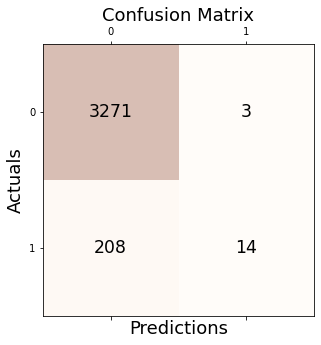

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_lr, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_lr.shape[0]):
    for j in range(conf_matrix_lr.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_lr[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [13]:
print('Precision: %.3f' % precision_score(y_test, y_pred_lr))
print('Recall: %.3f' % recall_score(y_test, y_pred_lr))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_lr))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_lr))

Precision: 0.824
Recall: 0.063
Accuracy: 0.940
F1 Score: 0.117


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,y_train)
print('Training Accuracy: ', accuracy_score(y_train, RF.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,RF.predict(X_test))))

Training Accuracy:  0.9907002958996759
Test Accuracy:  0.9636727688787186


In [15]:
y_pred_RF = RF.predict(X_test)
conf_matrix_RF = confusion_matrix(y_true = y_test, y_pred = y_pred_RF)

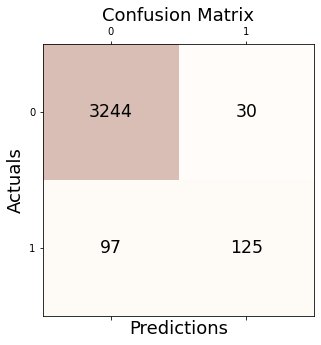

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_RF, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_RF.shape[0]):
    for j in range(conf_matrix_RF.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_RF[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [17]:
print('Precision: %.3f' % precision_score(y_test, y_pred_RF))
print('Recall: %.3f' % recall_score(y_test, y_pred_RF))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_RF))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_RF))

Precision: 0.806
Recall: 0.563
Accuracy: 0.964
F1 Score: 0.663


# Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)
print('Training Accuracy: ', accuracy_score(y_train, NB.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,NB.predict(X_test))))

Training Accuracy:  0.9341975482598281
Test Accuracy:  0.9399313501144165


In [19]:
y_pred_NB = NB.predict(X_test)
conf_matrix_NB = confusion_matrix(y_true = y_test, y_pred = y_pred_NB)

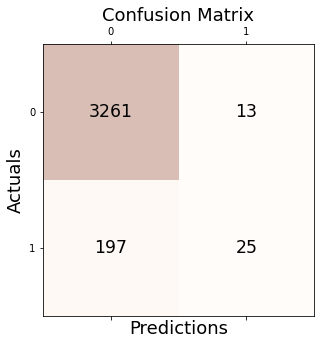

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_NB, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_NB.shape[0]):
    for j in range(conf_matrix_NB.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_NB[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:
print('Precision: %.3f' % precision_score(y_test, y_pred_NB))
print('Recall: %.3f' % recall_score(y_test, y_pred_NB))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_NB))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_NB))

Precision: 0.658
Recall: 0.113
Accuracy: 0.940
F1 Score: 0.192


# K-Nearest Neighbors

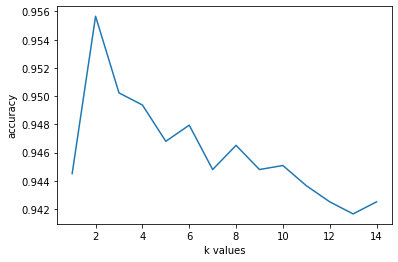

In [22]:
from sklearn.neighbors import KNeighborsClassifier

score_list = []
for each in range(1,15):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(X_train,y_train)
    score_list.append(knn_n.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
print('Training Accuracy: ', accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,knn.predict(X_test))))

Training Accuracy:  0.9684373679019304
Test Accuracy:  0.9556636155606407


In [24]:
y_pred_knn = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_true = y_test, y_pred = y_pred_knn)

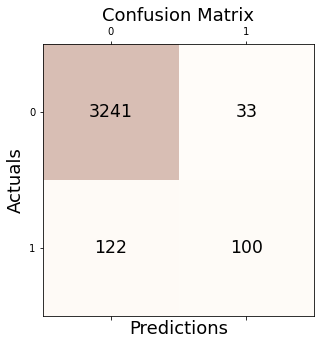

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_knn, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_knn[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [26]:
print('Precision: %.3f' % precision_score(y_test, y_pred_knn))
print('Recall: %.3f' % recall_score(y_test, y_pred_knn))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_knn))

Precision: 0.752
Recall: 0.450
Accuracy: 0.956
F1 Score: 0.563


# XGBoost

In [27]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)
print('Training Accuracy: ', accuracy_score(y_train, xgb.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,xgb.predict(X_test))))

Training Accuracy:  0.9842186839509652
Test Accuracy:  0.9653890160183066


In [29]:
y_pred_xgb = xgb.predict(X_test)
conf_matrix_xgb = confusion_matrix(y_true = y_test, y_pred = y_pred_xgb)

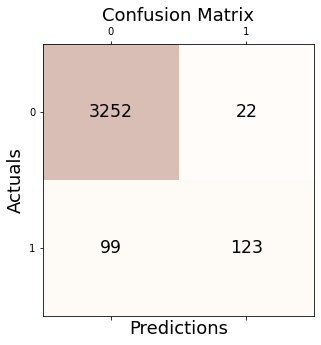

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_xgb, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_xgb.shape[0]):
    for j in range(conf_matrix_xgb.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_xgb[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [31]:
print('Precision: %.3f' % precision_score(y_test, y_pred_xgb))
print('Recall: %.3f' % recall_score(y_test, y_pred_xgb))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_xgb))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_xgb))

Precision: 0.848
Recall: 0.554
Accuracy: 0.965
F1 Score: 0.670


Among the models we used, random forest has the appropriate performance.

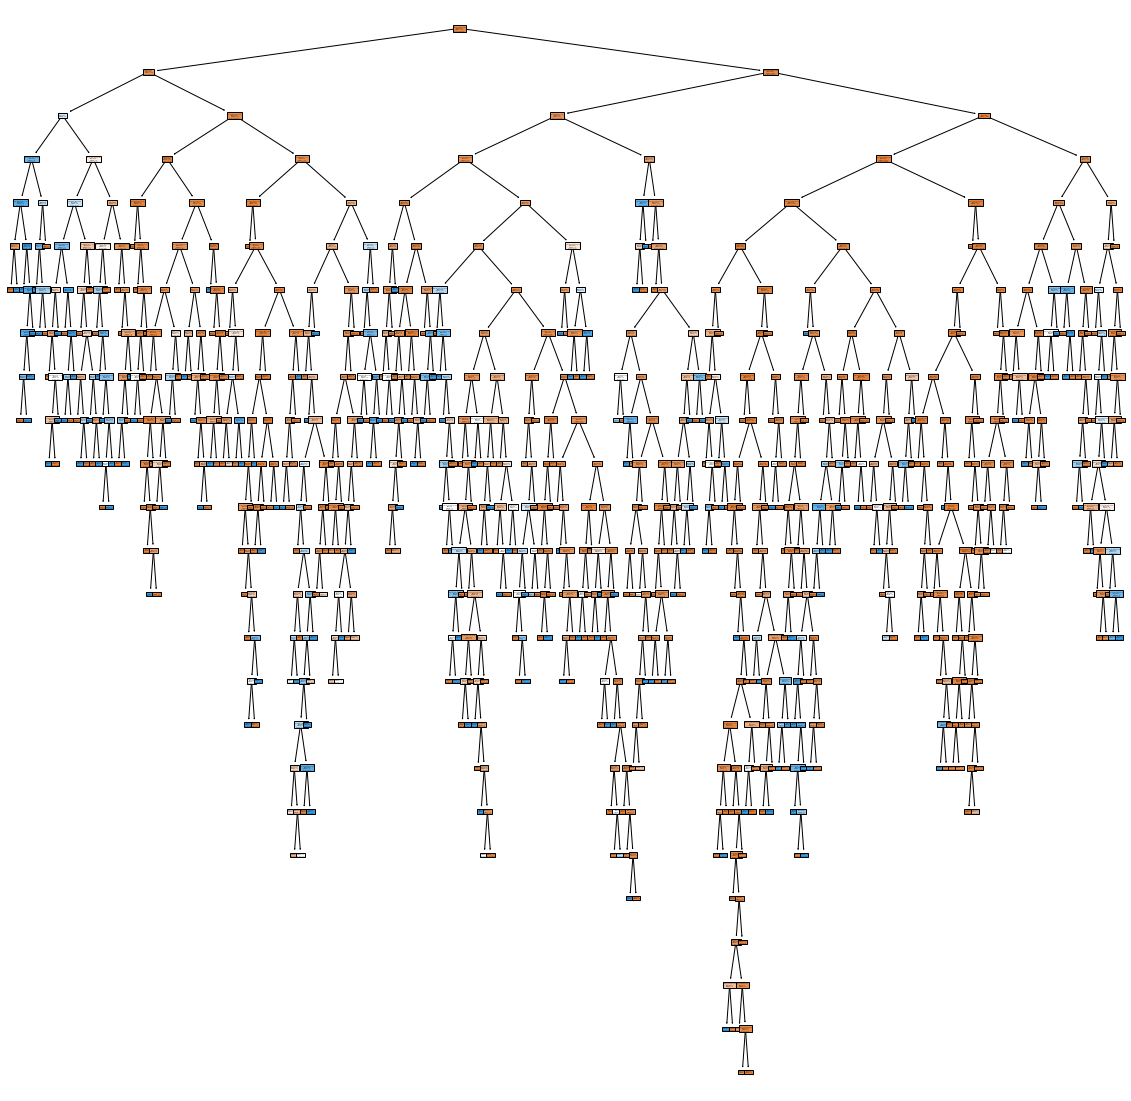

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(RF.estimators_[0], feature_names=X_train.columns, filled=True)